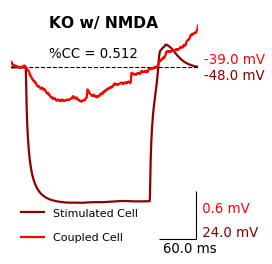

In [2]:
# Haley Speed (haley.e.speed@gmail.com), Center for Integrated Brain Research, Seattle Children's Research Institute
# If the axes plot weird, make sure all data in the column is numeric (no '--' denoting missing data, etc)


# Import packages
import matplotlib.pyplot as plt  #For plotting/graphing
import pandas as pd              # For working with spreadsheets
import os                        # For working with files and directories 
import csv                       # For working with spreadsheets
import datetime                  # For timestamping your work
import numpy as np               # For math functions
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar  # Package for scale bars


# Input File variables
dir_in = 'D:\\Dropbox\\Code\\N-coding\\Traces'
file_traces = 'dual_traces.csv'      # Data to plot raw traces for coupled pairs
save_name = 'dual_traces'

# Directory functions
os.chdir(dir_in)                            # Change the current directory to the one with all of your csv files
now = datetime.datetime.now()               # Gets the current date and time
date_string = now.strftime('%y%m%d %H.%M')  # formats the current date and time
dir_out = dir_in + '\\' + date_string       # Creates a timestamped name for a new folder for your output files

# Load worksheets into pandas dataframes (df). 1 Worksheet = 1 dataframe
df_traces = pd.read_csv (file_traces)

# Graph variables
x_column_name = 'Time'
y_column_name1 = 'Stim KO NMDA'
y_column_name2 = 'Rec KO NMDA'
line_name1 = 'Stimulated Cell'
line_name2 = 'Coupled Cell'
group_name = 'KO w/ NMDA'
coeff = 0.512
vm1 = -48.0
vm2 = -39.0

# Scales
x_min = 0 
x_max = 300
y_min1 = -140
y_min2 = -41.4
y_max1 = y_min1 + 120         # Scales of y axes are a mathematically determined range 
y_max2 = y_min2 + 3

# Line asthestics
line_color1 = 'darkred'
line_style1 = '-'
line_width1 = 2
line_color2 = 'red'
line_style2 = '-'
line_width2 = 2

# Tick length is determined mathematically 
# For longer or shorter scale bars adjust the divisor
x_tick_length = (x_max-x_min)/5
y_tick_length1 =(y_max1-y_min1)/5
y_tick_length2 = (y_max2-y_min2)/5

# Define tick labels
x_tick_units = 'ms'
y_tick_units1 = 'mV'
y_tick_units2 = 'mV'

# Horizontal line asthetics
y_hline = vm1
y_hline_marker = '--'
y_hline_color = 'black'
y_hline_width = 1
y_hline_start = x_min
y_hline_end = x_max

# Figure details
plot_dpi = 80                  # low resolution for viewing
save_dpi = 300                 # High resolution for publication quality     
save_fig = save_name +'.jpg'   # Can also save as .pdf or .png 

# Assign data to x and y variables
x_data = df_traces[x_column_name]
y_data1 = df_traces[y_column_name1]
y_data2 = df_traces[y_column_name2]


# Generate the Figure and layer1 (ax1)
# *********************INCREASE DPI TO 300 FOR PUBLICATION/PRESENTATIONS************************
fig, ax1 = plt.subplots(figsize=(3, 4), dpi=plot_dpi) # subplots rather than plt will be used to fine-tune the output

# Create a second layer based on the first layer (ax1)
ax2 = ax1.twinx()

# Plot the data
ax1.plot(x_data, y_data1, line_style1, lw = line_width1, color = line_color1, label = line_name1) 
ax2.plot(x_data, y_data2, line_style2, lw = line_width2, color = line_color2, label = line_name2) 

# Add a horizontal line
ax1.axhline(y_hline, y_hline_start, y_hline_end , color = y_hline_color, lw = y_hline_width, linestyle = y_hline_marker) 
y_hline_label1 = str(y_hline) + ' mV'
y_hline_label2 = str(vm2) + ' mV'
ax1.text(x_max+10, y_hline-6, y_hline_label1, size = 12, color = line_color1)
ax1.text(x_max+10, y_hline + 2, y_hline_label2, size = 12, color = line_color2)

# Set axes limits [xmin, xmax, ymin, ymax]
ax1.axis ([x_min, x_max, y_min1, y_max1]) 
ax2.axis ([x_min, x_max, y_min2, y_max2])

# Set tick lengths
ax1.xaxis.set_ticks(np.arange(x_min, x_max, x_tick_length))
ax1.yaxis.set_ticks(np.arange(y_min1, y_max1, y_tick_length1))
ax2.yaxis.set_ticks(np.arange(y_min2, y_max2, y_tick_length2))

# Remove bounding lines 
ax1.spines['top'].set_visible (False)
ax1.spines['right'].set_visible (False)
ax1.spines['left'].set_visible (False)
ax1.spines['bottom'].set_visible (False)
ax2.spines['top'].set_visible (False)
ax2.spines['right'].set_visible (False)
ax2.spines['left'].set_visible (False)
ax2.spines['bottom'].set_visible (False)

# Remove ticks and labels
ax1.yaxis.set_ticks([])
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_ticks([])
ax1.xaxis.set_ticklabels([])
ax2.yaxis.set_ticks([])
ax2.yaxis.set_ticklabels([])

# Create legend
ax1.legend(loc = 'lower left', bbox_to_anchor=(0, 0.1), frameon = False) 
ax2.legend(loc = 'lower left', bbox_to_anchor=(0, 0), frameon = False)

# Create scale bar
x_label = str(x_tick_length) + ' ' + x_tick_units
y_label1 = ' ' + str(y_tick_length1) + ' ' + y_tick_units1
y_label2 = ' ' + str(y_tick_length2) + ' ' + y_tick_units2
x_scalebar = AnchoredSizeBar(ax1.transData, x_tick_length, '', 'lower right', pad=0, color='black', frameon=False, size_vertical= 0.2)
y_scalebar1 = AnchoredSizeBar(ax1.transData, 1.4, '', 'lower right', pad=0, color='black', frameon=False, size_vertical= y_tick_length1)
ax1.add_artist(x_scalebar)
ax1.add_artist(y_scalebar1)

# Add scale and units to error bars
ax1.text(x_max-55, y_min1, x_label, size = 12)
ax1.text(x_max, y_min1 + 8, y_label1, size = 12, color = line_color1)
ax2.text(x_max, y_min2 +.5, y_label2, size = 12, color = line_color2)

# Add coupling coefficient
coeff_label = '%CC = ' + str(coeff)
ax1.text(x_max/5, y_hline + 5, coeff_label, size = 12)

# Add a title
ax1.text(x_max/5, y_hline + 20, group_name, size = 14, color = 'black', fontweight = 'bold')

plt.show()

# Saves data to a new subfolder
try:
    os.stat(dir_out)
except:
    os.mkdir(dir_out)
# Write data to file
os.chdir(dir_out)
fig.savefig(save_fig, dpi=save_dpi, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format=None,
    transparent=False, bbox_inches='tight', pad_inches=0.1,
    frameon=None, metadata=None)
os.chdir(dir_in)

